In [55]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import accuracy_score,classification_report
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
plt.rcParams['font.family']='serif'
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df1=pd.read_csv('travel insurance.csv')
df1=df1.dropna()

<Axes: >

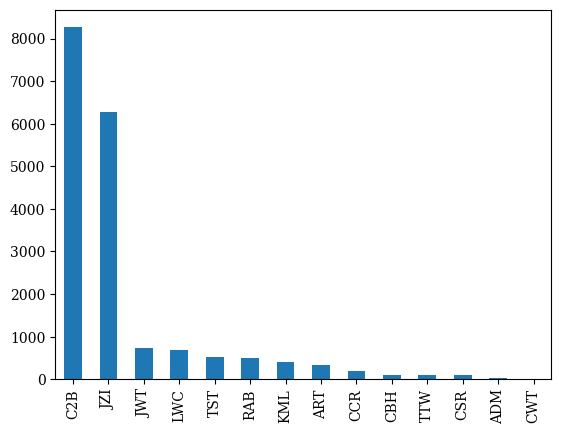

In [56]:
df1['Agency'].value_counts().plot(kind='bar')

<Axes: >

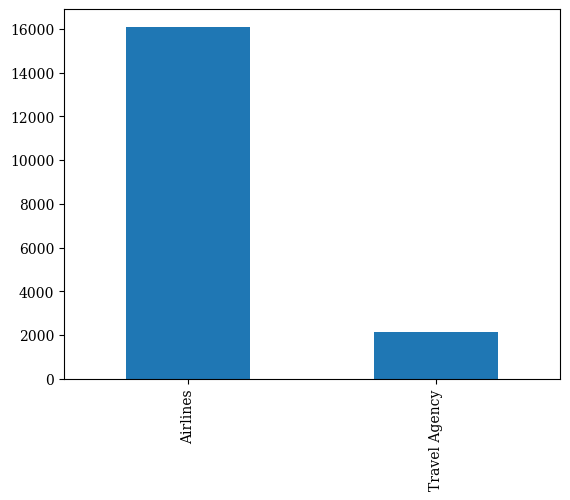

In [57]:
df1['Agency Type'].value_counts().plot(kind='bar')

<Axes: >

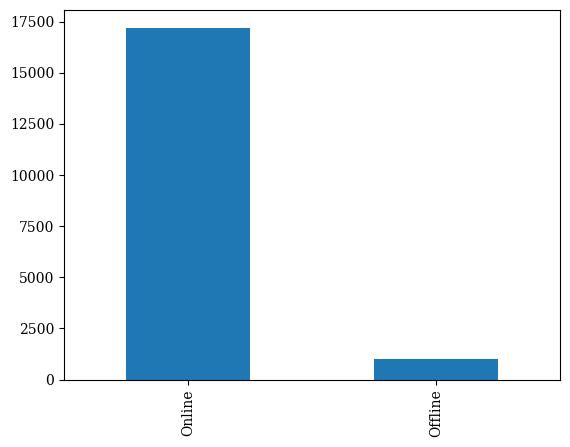

In [58]:
df1['Distribution Channel'].value_counts().plot(kind='bar')

<Axes: >

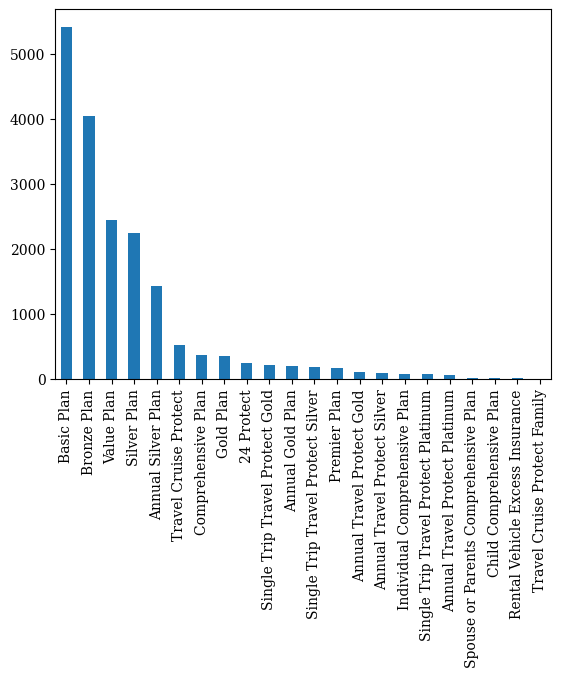

In [59]:
df1['Product Name'].value_counts().plot(kind='bar')

<Axes: >

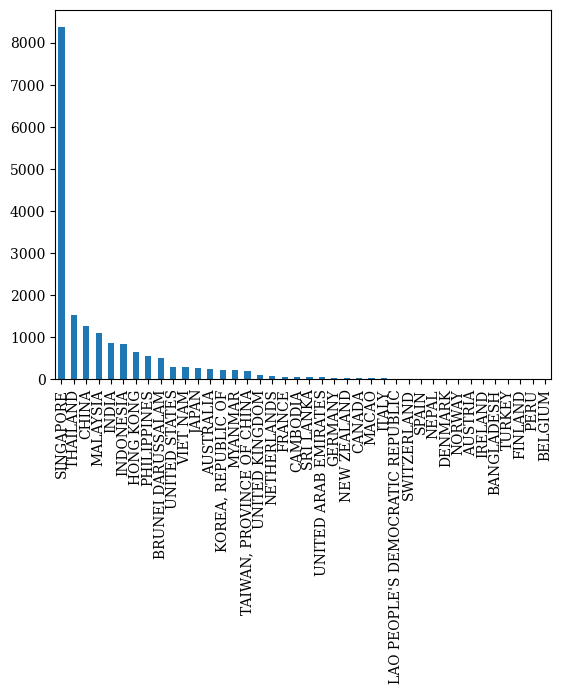

In [60]:
df1['Destination'].value_counts()[:40].plot(kind='bar')

<Axes: >

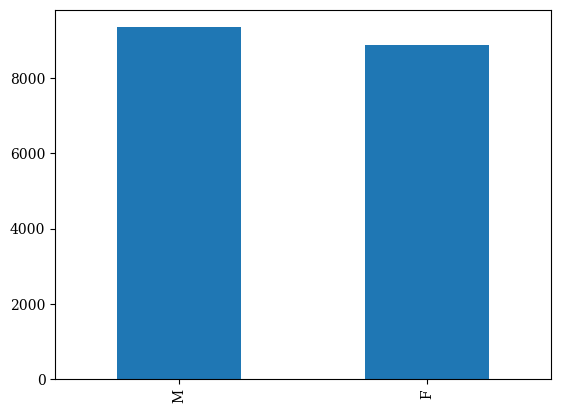

In [61]:
df1['Gender'].value_counts().plot(kind='bar')

<Axes: >

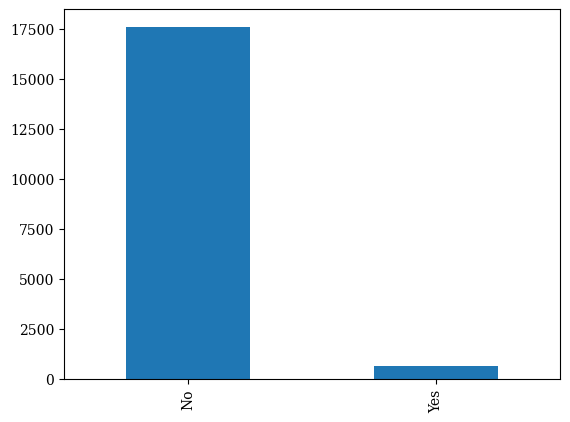

In [62]:
#Label distribution
df1['Claim'].value_counts().plot(kind='bar')

In [63]:
#Numericalize categorical variables
categorical_cols=['Agency','Agency Type','Distribution Channel','Product Name',
                  'Claim','Destination','Gender']

def transform_categorical_to_nums(df1,col_list):
    for j in col_list:
        dict1={}
        for i,index in enumerate(df1[j].value_counts().index):
            dict1[index]=i
        def get_number(col_value,dict1=dict1):
            return dict1[col_value]
        df1[j]=df1[j].apply(get_number)
    return df1

df2=transform_categorical_to_nums(df1=df1,
                                  col_list=categorical_cols)

In [64]:
train_cols=df2.columns.drop(['Claim'])
x_train,x_test,y_train,y_test=train_test_split(df2[train_cols],df2['Claim'],
                                               shuffle=True,
                                               test_size=0.2,
                                               random_state=0)
print('Before Processing..')
print(pd.Series(y_train).value_counts())

Before Processing..
0    14066
1      509
Name: Claim, dtype: int64


In [65]:
# balance label
from imblearn.over_sampling import SMOTE
oversampler=SMOTE(random_state=0)
os_features,os_labels=oversampler.fit_resample(x_train,y_train)
print('After Processing..')
print(pd.Series(os_labels).value_counts())

After Processing..
0    14066
1    14066
Name: Claim, dtype: int64


In [66]:
accuracy_list=[]
for C in tqdm(np.arange(0.5,5,0.1)):
    # Define the cross-validation folds
    kf = KFold(n_splits=3, random_state=42,shuffle=True)
    # Estimate the cross-validation scores
    scores = []
    for i, (train_index, test_index) in enumerate(kf.split(os_features, os_labels)):
        train_data, train_label = os_features.values[train_index], os_labels.values[train_index]
        test_data, test_label = os_features.values[test_index], os_labels.values[test_index]
        clf = LogisticRegression( C=C, random_state=42,max_iter=int(1e6))
        clf.fit(train_data, train_label)
        pred=clf.predict(test_data)
        test_score = accuracy_score(pred, test_label)

        scores.append(test_score)
    accuracy_list.append(np.mean(scores))

100%|██████████| 45/45 [01:23<00:00,  1.85s/it]


Best Accuracy:73.15%


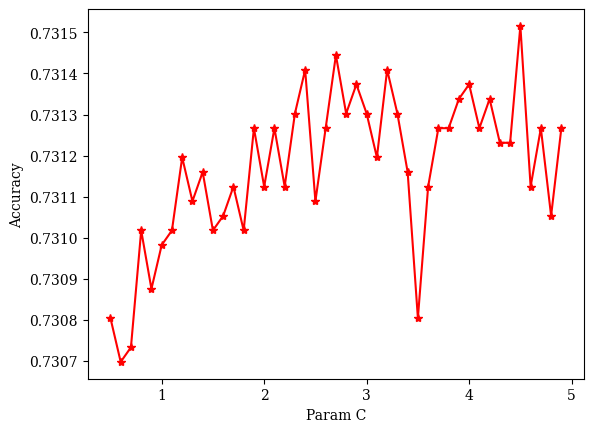

In [67]:
plt.plot(np.arange(0.5,5,0.1),accuracy_list,marker='*',c='r')
plt.xlabel('Param C')
plt.ylabel('Accuracy')
print(f'Best Accuracy:{max(accuracy_list)*100:.2f}%')

In [68]:
accuracy_list=[]
for depth in tqdm(np.arange(1,30,1)):
    # Define the cross-validation folds
    kf = KFold(n_splits=3, random_state=42,shuffle=True)
    # Estimate the cross-validation scores
    scores = []
    for i, (train_index, test_index) in enumerate(kf.split(os_features, os_labels)):
        train_data, train_label = os_features.values[train_index], os_labels.values[train_index]
        test_data, test_label = os_features.values[test_index], os_labels.values[test_index]
        clf = DecisionTreeClassifier(max_depth=depth)
        clf.fit(train_data, train_label)
        pred=clf.predict(test_data)
        test_score = accuracy_score(pred, test_label)
        scores.append(test_score)
    accuracy_list.append(np.mean(scores))

100%|██████████| 29/29 [00:03<00:00,  9.40it/s]


Best Accuracy:91.36%


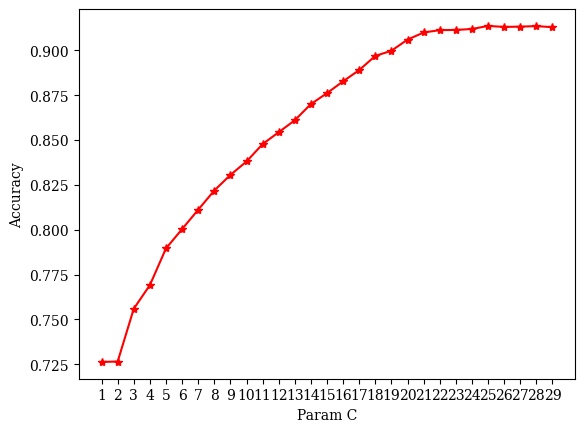

In [69]:
plt.plot(np.arange(1,30,1),accuracy_list,marker='*',c='r')
plt.xlabel('Param Depth')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1,30,1))
print(f'Best Accuracy:{max(accuracy_list)*100:.2f}%')

In [71]:
#selct best model
clf = DecisionTreeClassifier(max_depth=21)
clf.fit(train_data, train_label)
pred=clf.predict(test_data)
print(classification_report(test_label,pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      4704
           1       0.88      0.93      0.91      4673

    accuracy                           0.91      9377
   macro avg       0.91      0.91      0.91      9377
weighted avg       0.91      0.91      0.91      9377

